Ez egy komment rész.
Ide tudunk esetleg jegyzetelni, ha nem szeretnénk túlkommentálni a kódblokkokat.
### Markdown kompatibilis!


A gyors használátot segítő fontosabb billentyűzet kombinációk:
## Jupyter Lab környezetben

* **Ctrl + Enter** - jelenlegi cella futtatása
* **Shift + Enter** - jelenlegi cella futtatása, majd továbblépés
* **Esc** - kilépés a szerkesztő módból (így könnyebb lépkedni a cellák között)
* **Enter** - belépés a szerkesztő módba
* **2x D** - cella törlése (szerkesztő módon kívül)
* **A** - cella hozzáadása felülre (szerkesztő módon kívül)
* **B** - cella hozzáadása alulra (szerkesztő módon kívül)
* **Ctrl + /** : kommentelés

## Google Colab környezetben

* Hasonló módon, mint Jupyter Lab-ban, csak az egybetűs műveletekhez **Ctrl + M**-et kell nyomni
    * pl. Törlés: **Ctrl + M + D**
    * pl. Új cella a kijelölt fölé: **Ctrl + M + A**


In [2]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

#Ezekkel a meghívásokkal tudunk kernelszintű script-utasításokat kiadni (azaz akár virtuális környezetek is könnyen kiegészíthetőek egyes dependenciákkal), így ha esetleg hiányozna pár csomag a futtatókörnyezetünkből,
# akkor a ! jelzéssel könnyen letölthető a hiányzó csomag (a cella futtatásakor).

### Fontos!
A cellákat mindig futtatni kell, hogy a bennük lévő tartalom több cellában is felhasználható legyen.

In [3]:
import pandas as pd                 ## Adatelemzésre, adatmanipulációra használt könyvtár - adattisztításhoz, táblázatos adatokhoz, azok alap elemzéséhez
import numpy as np                  ## Numerikus műveletekhez, nagyobb mátrixok, adatszerkezetek számításához - vektorműveleteket is igénybe vesz!
import matplotlib.pyplot as plt     ## Adatvizualizációs könyvtár - adatokat irat ki.

In [4]:
#Olvassuk be a shipping_data.csv fájlt!

shipping_data = pd.read_csv('shipping_data.csv')
print(shipping_data)

    ID         Category         ProductName  Quantity  UnitPrice   OrderDate  \
0    1      Electronics              Laptop       5.0    1200.50  2025-03-15   
1    2         Clothing             T-Shirt      50.0      25.00  2025-03-16   
2    3       Home Goods        Coffee Maker      10.0      75.99  2025-03-16   
3    4      Electronics               Mouse      25.0      22.75  2025-03-17   
4    5            Books  Python Programming      30.0      45.50  2025-03-18   
5    6         Clothing               Jeans      20.0      60.00  2025-03-19   
6    7       Home Goods             Toaster       NaN      30.25  2025-03-20   
7    8      Electronics            Keyboard      15.0      85.00  2025-03-21   
8    9            Books  Data Science Intro      40.0      55.80  2025-03-22   
9   10         Clothing              Jacket      12.0     110.00  2025-03-23   
10  11  Office Supplies              Binder      50.0       3.50  2025-03-25   
11  12             Toys       Action Fig

In [5]:
#Számoljuk meg hány null érték van a táblázatban!
print(shipping_data.isnull().sum())

ID             0
Category       0
ProductName    0
Quantity       2
UnitPrice      1
OrderDate      0
Shipped        0
dtype: int64


In [6]:
#Mutassuk ki az adatok statisztikáit! (dtypes, describe, info)
print(shipping_data.dtypes)
print(shipping_data.describe())
print(shipping_data.info())

ID               int64
Category        object
ProductName     object
Quantity       float64
UnitPrice      float64
OrderDate       object
Shipped         object
dtype: object
              ID    Quantity    UnitPrice
count  30.000000   28.000000    29.000000
mean   15.500000   30.750000    98.274483
std     8.803408   32.196877   224.260040
min     1.000000    5.000000     2.990000
25%     8.250000   11.500000    20.000000
50%    15.500000   20.000000    40.000000
75%    22.750000   36.250000    60.000000
max    30.000000  150.000000  1200.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30 non-null     int64  
 1   Category     30 non-null     object 
 2   ProductName  30 non-null     object 
 3   Quantity     28 non-null     float64
 4   UnitPrice    29 non-null     float64
 5   OrderDate    30 non-null     object 
 6   Ship

In [7]:
# Probléma: ne legyen tört szám a mennyiség! Nincs 5.5 darab könyv, stb.
# Alakítsuk a megfelelő típusúvá az oszlopokat az astype, pd.to_datetime függvényekkel!
# Az mennyiségnél alapértelmezetten töltsük fel 1-el a null értékeket.
shipping_data["Quantity"] = shipping_data["Quantity"].fillna(1)
shipping_data["Quantity"] = shipping_data["Quantity"].astype(np.int64)
shipping_data["OrderDate"] = pd.to_datetime(shipping_data["OrderDate"])

print(shipping_data.isnull().sum())
print(shipping_data.dtypes)

ID             0
Category       0
ProductName    0
Quantity       0
UnitPrice      1
OrderDate      0
Shipped        0
dtype: int64
ID                      int64
Category               object
ProductName            object
Quantity                int64
UnitPrice             float64
OrderDate      datetime64[ns]
Shipped                object
dtype: object


In [8]:
#Alakítsuk át a Shipped oszlopot logikai értékké!
shipping_data["Shipped"] = shipping_data["Shipped"].apply(lambda value : 1 if value == "Yes" else 0)
print(shipping_data["Shipped"])

0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    1
14    0
15    1
16    1
17    0
18    1
19    1
20    1
21    0
22    1
23    1
24    0
25    1
26    1
27    0
28    1
29    1
Name: Shipped, dtype: int64


In [9]:
print(shipping_data.dtypes)
#shipping_data

ID                      int64
Category               object
ProductName            object
Quantity                int64
UnitPrice             float64
OrderDate      datetime64[ns]
Shipped                 int64
dtype: object


In [10]:
#Dobjuk el azokat az értékeket, ahol null szerepel valamelyik adattagban!
shipping_data = shipping_data.dropna()

In [ ]:
#Számoljuk meg egy Revenue oszlopban, hogy mennyi az összes bevétel az adott rendelésből!
shipping_data["Revenue"] = shipping_data["Quantity"] * shipping_data["UnitPrice"]
shipping_data

,ID,Category,ProductName,Quantity,UnitPrice,OrderDate,Shipped,Revenue
0,1,Electronics,Laptop,5,1200.50,2025-03-15,1,6002.50
1,2,Clothing,T-Shirt,50,25.00,2025-03-16,1,1250.00
2,3,Home Goods,Coffee Maker,10,75.99,2025-03-16,0,759.90
3,4,Electronics,Mouse,25,22.75,2025-03-17,1,568.75
4,5,Books,Python Programming,30,45.50,2025-03-18,1,1365.00
5,6,Clothing,Jeans,20,60.00,2025-03-19,0,1200.00
6,7,Home Goods,Toaster,1,30.25,2025-03-20,1,30.25
7,8,Electronics,Keyboard,15,85.00,2025-03-21,1,1275.00
8,9,Books,Data Science Intro,40,55.80,2025-03-22,0,2232.00
9,10,Clothing,Jacket,12,110.00,2025-03-23,1,1320.00


In [20]:
# Csináljunk egy books változót, amiben eltároljuk azokat az adatokat, amelyek a Books kategóriában vannak!
# (Figyeljünk a helyes feltételekre!)
books = shipping_data[(shipping_data["Category"] == "Books") & (shipping_data["Shipped"] == 1)]
books

,ID,Category,ProductName,Quantity,UnitPrice,OrderDate,Shipped,Revenue
4,5,Books,Python Programming,30,45.50,2025-03-18,1,1365.00
15,16,Books,Sci-Fi Novel,25,19.95,2025-03-28,1,498.75
22,23,Books,Cookbook,22,32.50,2025-04-02,1,715.00
28,29,Books,History Book,17,40.00,2025-04-06,1,680.00


In [21]:
# Kérdezzük le, hogy mik az áprilisi rendelések!
april_orders = shipping_data[shipping_data["OrderDate"].dt.month == 4]
april_orders

,ID,Category,ProductName,Quantity,UnitPrice,OrderDate,Shipped,Revenue
20,21,Home Goods,Blender,1,99.99,2025-04-01,1,99.99
21,22,Electronics,Monitor,7,250.00,2025-04-01,0,1750.00
22,23,Books,Cookbook,22,32.50,2025-04-02,1,715.00
23,24,Office Supplies,Sticky Notes,150,2.99,2025-04-03,1,448.50
24,25,Toys,Doll,12,28.00,2025-04-03,0,336.00
25,26,Clothing,Scarf,35,20.00,2025-04-04,1,700.00
26,27,Home Goods,Kettle,9,48.50,2025-04-05,1,436.50
27,28,Electronics,Tablet,6,350.00,2025-04-06,0,2100.00
28,29,Books,History Book,17,40.00,2025-04-06,1,680.00


In [23]:
#Adjuk meg, hogy mennyi volt a márciusban kiszállított termékek összértéke!
march_shipped = shipping_data[(shipping_data["OrderDate"].dt.month == 3) &
                              (shipping_data["Shipped"] == 1)]
print(march_shipped["Revenue"].sum(), "$")

16507.75 $


In [ ]:
#Adjuk meg, hogy mennyi volt a bevételünk napi lebontásban!
shipped_by_days = shipping_data.groupby(by=shipping_data["OrderDate"])["Revenue"].sum()
print(shipped_by_days)

<class 'pandas.core.series.Series'>


[]

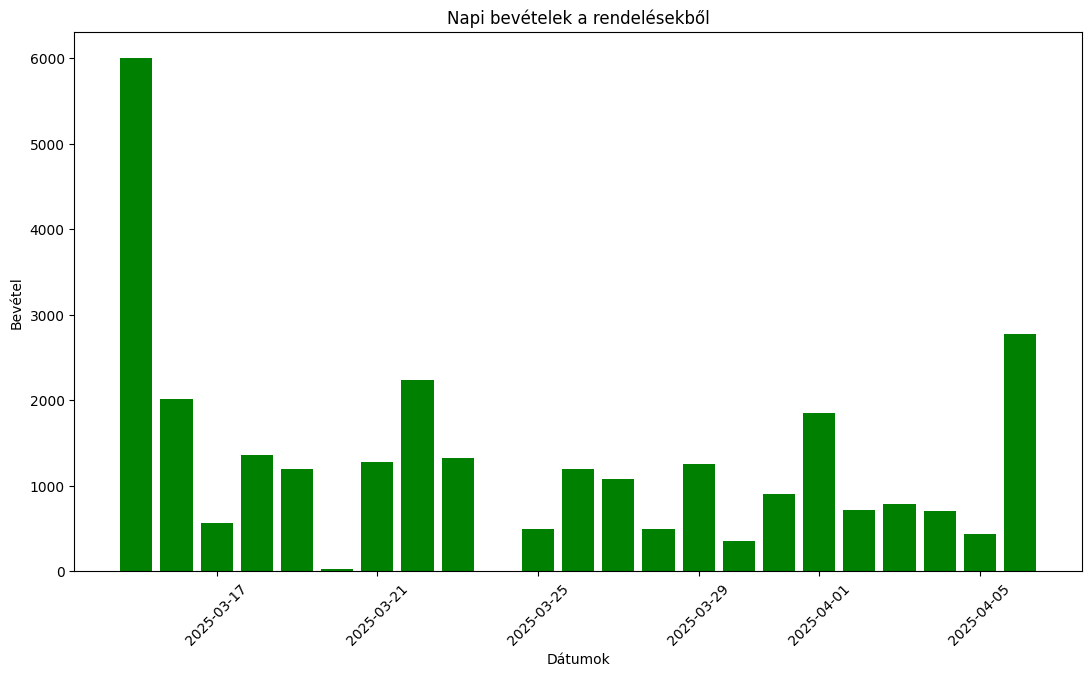

In [31]:
#Rajzoljuk ki a napi bevételeket grafikonnal!
plt.figure(figsize=(13,7))
plt.title("Napi bevételek a rendelésekből")
plt.xlabel("Dátumok")
plt.ylabel("Bevétel")
plt.xticks(rotation=45)
plt.bar(shipped_by_days.index, shipped_by_days.values, color="green")
plt.plot()